In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [22]:
df = pd.read_csv('spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [23]:
X = df.drop('is_churned', axis=1)
y = df['is_churned']

In [24]:
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'country', 'subscription_type', 'device_type'], dtype='object')

In [25]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['user_id', 'age', 'listening_time', 'songs_played_per_day', 'skip_rate',
       'ads_listened_per_week', 'offline_listening'],
      dtype='object')

In [26]:
X_cat = X[categorical_columns]

In [27]:
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat.head()

,gender_Male,gender_Other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,False,True,False,True,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,True,True,False
4,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [28]:
X_encoded = pd.concat([X_cat, X[numeric_columns]], axis=1)
X_encoded.head()

,gender_Male,gender_Other,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,...,subscription_type_Student,device_type_Mobile,device_type_Web,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,1,54,26,23,0.20,31,0
1,False,True,False,True,False,False,False,False,False,False,...,False,False,True,2,33,141,62,0.34,0,1
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,3,38,199,38,0.04,0,1
3,False,False,True,False,False,False,False,False,False,False,...,True,True,False,4,22,36,2,0.31,0,1
4,False,True,False,False,False,False,False,False,True,False,...,False,True,False,5,29,250,57,0.36,0,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

0.60875


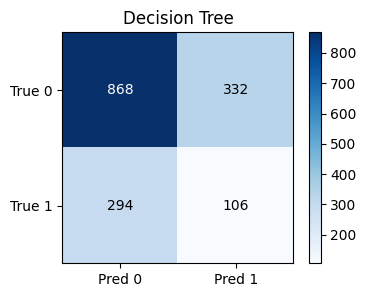

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)
acc = accuracy_score(preds, y_test)
print(acc)
cm = confusion_matrix(y_test, preds)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Decision Tree')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

0.75


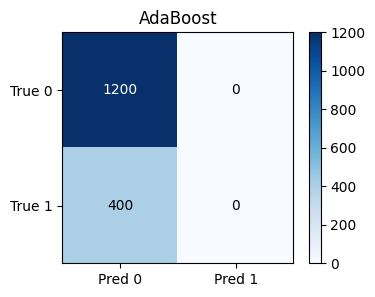

In [31]:
ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train, y_train)
preds_ad = ad.predict(X_test)
acc_ad = accuracy_score(preds_ad, y_test)
print(acc_ad)
cm = confusion_matrix(y_test, preds_ad)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('AdaBoost')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

0.746875


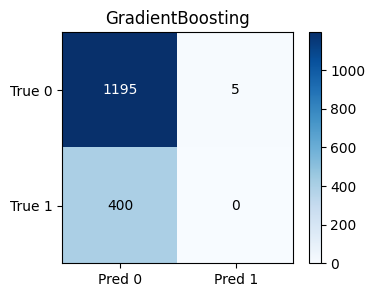

In [32]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)
acc_gb = accuracy_score(preds_gb, y_test)
print(acc_gb)
cm = confusion_matrix(y_test, preds_gb)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('GradientBoosting')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

0.71875


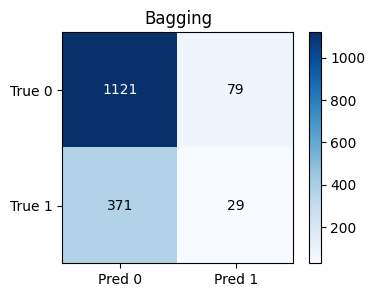

In [33]:
bc = BaggingClassifier(random_state=42)
bc.fit(X_train, y_train)
preds_bc = bc.predict(X_test)
acc_bc = accuracy_score(preds_bc, y_test)
print(acc_bc)
cm = confusion_matrix(y_test, preds_bc)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Bagging')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

0.646875


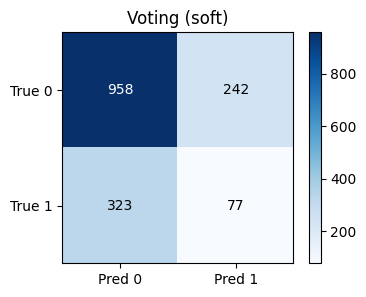

In [34]:
v = VotingClassifier(estimators = [('dt', dt), ('ad', ad), ('gb', gb )], voting = 'soft')
v.fit(X_train, y_train)
preds_v = v.predict(X_test)
acc_v = accuracy_score(y_test, preds_v)
print(acc_v)
cm = confusion_matrix(y_test, preds_v)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Voting (soft)')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

In [35]:
sv = SVC(probability=True, kernel = 'rbf')

In [36]:
vsvm = VotingClassifier(estimators = [('sv', sv), ('ad', ad), ('gb', gb )], voting = 'hard')
vsvm.fit(X_train, y_train)
preds_vsvm = vsvm.predict(X_test)
acc_vsvm = accuracy_score(y_test, preds_vsvm)
print(acc_vsvm)

0.75


0.75


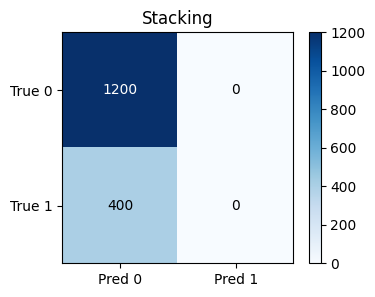

In [37]:
lr = LogisticRegression()
st = StackingClassifier(estimators = [('dt', dt), ('ad', ad), ('gb', gb )], final_estimator=lr)
st.fit(X_train, y_train)
preds_st = st.predict(X_test)
acc_st = accuracy_score(y_test, preds_st)
print(acc_st)
cm = confusion_matrix(y_test, preds_st)
fig, ax = plt.subplots(figsize=(4,3))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Stacking')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Pred 0','Pred 1'])
ax.set_yticklabels(['True 0','True 1'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.colorbar(im, ax=ax)
plt.show()

Accuracy_graph


Text(0.5, 0, 'Models')

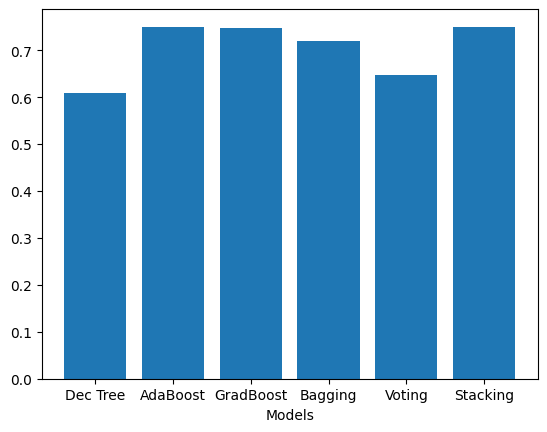

In [38]:
print('Accuracy_graph')
models = ['Dec Tree', 'AdaBoost', 'GradBoost', 'Bagging', 'Voting', 'Stacking']
accuracies = [acc, acc_ad, acc_gb, acc_bc, acc_v, acc_st]
plt.bar(models, accuracies)
plt.xlabel('Models')

In [39]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [41]:
X = df.drop('charges', axis=1)
y = df['charges']

In [42]:
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [43]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['age', 'bmi', 'children'], dtype='object')

In [44]:
X_cat = X[categorical_columns]

In [45]:
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,False,True,False,False,True
1,True,False,False,True,False
2,True,False,False,True,False
3,True,False,True,False,False
4,True,False,True,False,False


In [46]:
X_encoded = pd.concat([X_cat, X[numeric_columns]], axis=1)
X_encoded.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,False,True,False,False,True,19,27.900,0
1,True,False,False,True,False,18,33.770,1
2,True,False,False,True,False,28,33.000,3
3,True,False,True,False,False,33,22.705,0
4,True,False,True,False,False,32,28.880,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [48]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)
r2 = r2_score(y_test, preds)
print(r2)

0.7265877305258355


In [49]:
ad = AdaBoostRegressor(random_state=42)
ad.fit(X_train, y_train)
preds_ad = ad.predict(X_test)
r2_ad = r2_score(y_test, preds_ad)
print(r2_ad)

0.8213065823275454


In [50]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)
r2_gb = r2_score(y_test, preds_gb)
print(r2_gb)

0.8789518532850926


In [51]:
bc = BaggingRegressor(random_state=42)
bc.fit(X_train, y_train)
preds_bc = bc.predict(X_test)
r2_bc = r2_score(y_test, preds_bc)
print(r2_bc)

0.8565794099814181



In [52]:
v = VotingRegressor(estimators = [('dt', dt), ('ad', ad), ('gb', gb )])
v.fit(X_train, y_train)
preds_v = v.predict(X_test)
r2_v = r2_score(y_test, preds_v)
print(r2_v)

0.8546284873041823



In [53]:
lr = LinearRegression()
st = StackingRegressor(estimators = [('dt', dt), ('ad', ad), ('gb', gb )], final_estimator=lr)
st.fit(X_train, y_train)
preds_st = st.predict(X_test)
r2_st = r2_score(y_test, preds_st)
print(r2_st)

0.879609344188084


R2_Score_graph


Text(0.5, 0, 'Models')

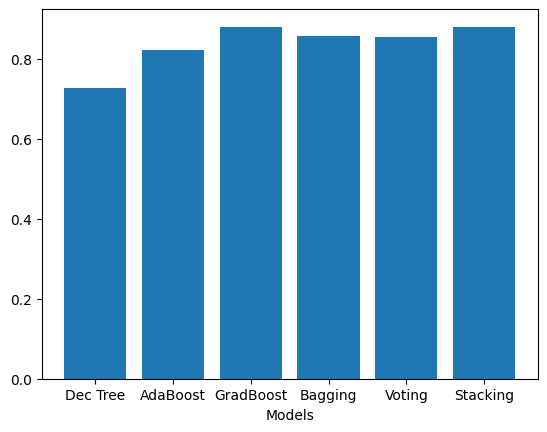

In [54]:
print('R2_Score_graph')
models = ['Dec Tree', 'AdaBoost', 'GradBoost', 'Bagging', 'Voting', 'Stacking']
r2_scores = [r2, r2_ad, r2_gb, r2_bc, r2_v, r2_st]
plt.bar(models, r2_scores)
plt.xlabel('Models')